In [1]:
import string
import re
import graphlab
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

This non-commercial license of GraphLab Create for academic use is assigned to surbhi.jain@sjsu.edu and will expire on November 21, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1511374953.log


# Jokes data and user ratings, data cleaning

In [13]:
def clean_data():
    #with open('../data/jester_dataset_2/jester_items.dat') as f:
    with open('../data/Jokes_labelling.txt') as f:
        #text = f.read().lower().split('</p>')
        text = f.read().lower().splitlines()
        text = [" ".join(i.split('\t')[1].split('|||')) for i in text[1:]]
        text = [re.sub(r'([^\.\s\w]|_)+', '', i).replace(".", ". ") for i in text]
        text = [line.replace('\r', '') for line in text]
        text = [line.replace('\n', '') for line in text]
        text = [line.replace('<br />', '') for line in text]
        text = [line.replace('<p>', '') for line in text]
        text = [line.replace('&quot;', '') for line in text]
        text = [line.replace('&#039;', '') for line in text]
        #text = [re.sub(" \d+", " ", line) for line in text]
        text = [line.split(':', 1)[-1] for line in text]
        #text = text[:150]
    return text

In [23]:
text = clean_data()
text[0]

'a man visits the doctor.  the doctor says i have bad news for you. you have cancer and alzheimers disease.  the man replies wellthank god i dont have cancer'

In [24]:
ratings_data = pd.read_csv('../data/jester_dataset_2/jester_ratings.dat', sep='\t')
msk = np.random.rand(len(ratings_data)) < 0.8
user_ratings_train = ratings_data[msk]
user_ratings_test = ratings_data[~msk]
train_data = graphlab.SFrame(user_ratings_train)
test_data = graphlab.SFrame(user_ratings_test)

In [16]:
user_ratings_train.head(5)

,user_id,joke_id,rating
1,1,7,-9.281
2,1,8,-9.281
4,1,15,0.875
6,1,17,-9.031
7,1,18,-7.469


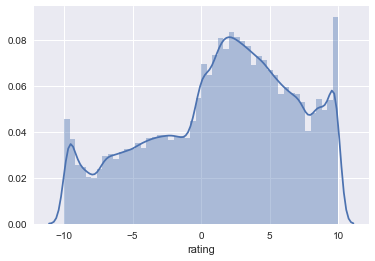

In [17]:
sns.distplot(user_ratings_train['rating'])

In [18]:
filter_good_rating = user_ratings_train[user_ratings_train.rating > 8]
jokes_good_rating = filter_good_rating.joke_id.unique()
[text[i-1] for i in jokes_good_rating][:5]

['a radio conversation of a us naval ship with canadian authorities . . .  americans please divert your course 15 degrees to the north to avoid a collision.   canadians recommend you divert your course 15 degrees to the south to avoid a collision.   americans this is the captain of a us navy ship.  i say again divert your course.   canadians no.  i say again you divert your course.   americans this is the aircraft carrier uss lincoln the second largest ship in the united states atlantic fleet.  we are accompanied by three destroyers three cruisers and numerous support vessels.  i demand that you change your course 15 degrees north thats one five degrees north or countermeasures will be undertaken to ensure the safety of this ship.   canadians this is a lighthouse.  your call. ',
 '    do you believe in life after death  the boss asked one of his employees.      yes sir  the new recruit replied.       well then that makes everything just fine. . .   the boss went on.       after you lef

In [19]:
filter_bad_rating = user_ratings_train[user_ratings_train.rating < -8]
jokes_bad_rating = filter_bad_rating.joke_id.unique()
jokes_bad_rating.max()
[text[i-1] for i in jokes_bad_rating][:5]

['how many feminists does it take to screw in a light bulb thats not funny. ',
 'q.  did you hear about the dyslexic devil worshiper a.  he sold his soul to santa. ',
 'how many men does it take to screw in a light bulb one. . . men will screw anything. ',
 'q if a person who speaks three languages is called trilingual and a person who speaks two languages is called bilingual what do call a person who only speaks one language a american',
 'whats the difference between a macintosh and an etchasketch you dont have to shake the mac to clear the screen. ']

In [20]:
user_ratings_train.joke_id.describe().T

count    839389.000000
mean         70.079907
std          46.306069
min           5.000000
25%          19.000000
50%          68.000000
75%         112.000000
max         150.000000
Name: joke_id, dtype: float64

## See if there is a correlation between the length of the joke and its rating

1048575
255.0
(839389, 3)
(839389,)


/Users/ckhatri/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


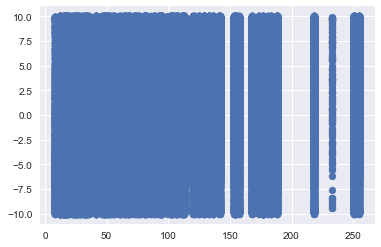

In [21]:
text = [line.translate(None, string.punctuation) for line in text]
length_joke_id = np.zeros(user_ratings_train.shape[0])
#length_joke_id = []
print ratings_data.shape[0]
set_joke_id = set()

ratings_list = []
joke_length_list = []

for i, joke_id in enumerate(list(user_ratings_train.joke_id)):
    set_joke_id.add(joke_id)
    try:
        length_joke_id[i] = int(len(text[joke_id - 1].split()))
        #ratings_list.append()
    except:
        print i, joke_id
#print list(length_joke_id)
#print list(set_joke_id)
#print list(set_id)
print max(length_joke_id)
print user_ratings_train.shape
print length_joke_id.shape
user_ratings_train['length_joke_id'] = length_joke_id

user_ratings_train.head()
plt.scatter(x=user_ratings_train.length_joke_id, y=user_ratings_train.rating)